In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

In [2]:
RTOL = 0.
ATOL = 1e-6

![PageRank](http://quicksprout-wpengine.netdna-ssl.com/images/googlepagerank.jpg)

**PageRank** is an algorithm used by Google Search to rank websites in their search engine results. PageRank was named after Larry Page, one of the founders of Google. PageRank is a way of measuring the importance of website pages. According to Google:

> PageRank works by counting the number and quality of links to a page to determine a rough estimate of how important the website is. The underlying assumption is that more important websites are likely to receive more links from other websites.

It is not the only algorithm used by Google to order search engine results, but it is the first algorithm that was used by the company, and it is the best-known.

**All the graph examples in this notebook taked from the link below**

http://www.cs.princeton.edu/~chazelle/courses/BIB/pagerank.htm

In [3]:
def normalize(G):
    i = 0
    n_to_i = {}
    i_to_n = G.nodes()
    for node in G.nodes():
        n_to_i[node] = i
        i += 1
    return (n_to_i, i_to_n)

In [4]:
def pagerank(G, d=0.85, limit=100, debug=False):
    n_to_i, i_to_n = normalize(G)
    sz = len(G)
    M = np.zeros((sz, sz))
    for i in range(sz):
        neighs = [n_to_i[node] for node in G.neighbors(i_to_n[i])]
        if (len(neighs) > 0):
            M[neighs, i] = 1.0 / len(neighs)
    if debug:
        print(M)
    pr = np.ones(sz)
    old_pr = pr
    k = 0
    while k < limit:
        pr = (1 - d) + d * M.dot(pr)
        if debug:
            print(pr)
        if np.allclose(pr, old_pr, atol=ATOL, rtol=RTOL):
            break
        old_pr = pr
        k += 1
    return dict(zip(G.nodes(), pr)), k

In [5]:
def plot(G):
    nx.draw(G, pos=nx.fruchterman_reingold_layout(G), labels=dict(zip(G.nodes(), G.nodes())))

## Simple example

In [6]:
G1 = nx.DiGraph([('A', 'B'), ('A', 'C'), ('B', 'C'), ('C', 'A'), ('D', 'C')])

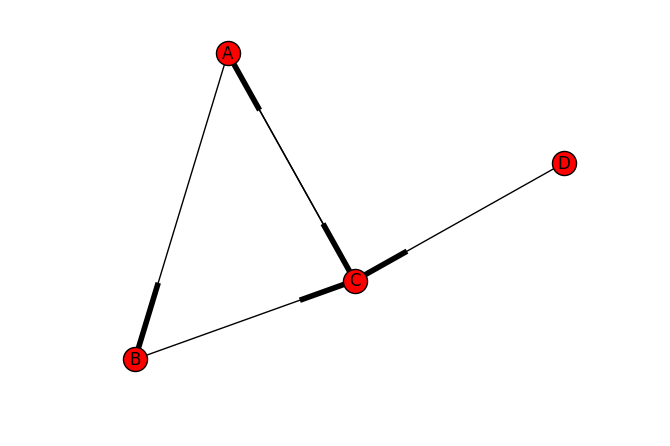

In [7]:
plot(G1)

In [8]:
pagerank(G1)

({'A': 1.4901077212512863,
  'B': 0.78329578153179669,
  'C': 1.5765964972169177,
  'D': 0.15000000000000002},
 28)

## External sites

In [9]:
G2 = nx.DiGraph(
    [('A', 'B'), ('B', 'A'), ('A', 'C'), ('C', 'A'), ('A', 'D'), ('D', 'A'), ('D', 'E'), ('D', 'F'), ('D', 'G'),
    ('D', 'H')]
)

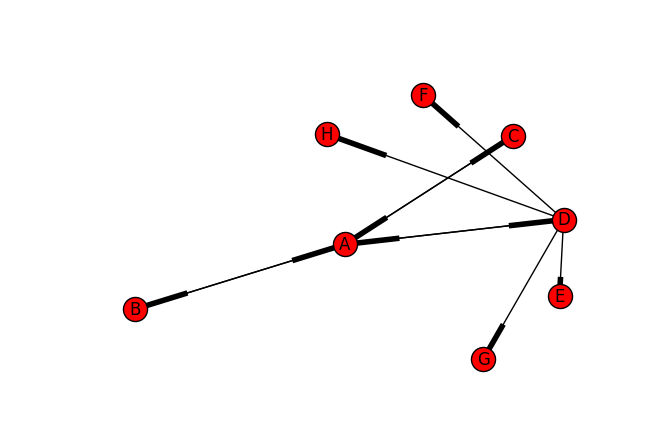

In [10]:
plot(G2)

In [11]:
pagerank(G2)

({'A': 0.91563369661733274,
  'B': 0.409429300792583,
  'C': 0.409429300792583,
  'D': 0.409429300792583,
  'E': 0.21960306332884844,
  'F': 0.21960306332884844,
  'G': 0.21960306332884844,
  'H': 0.21960306332884844},
 44)

## Let's add some cycles

In [12]:
G3 = nx.DiGraph(
    [('A', 'B'), ('B', 'A'), ('A', 'C'), ('C', 'A'), ('A', 'D'), ('D', 'A'), ('D', 'E'), ('D', 'F'), ('D', 'G'),
    ('D', 'H'), ('E', 'A'), ('F', 'A'), ('G', 'A'), ('H', 'A')]
)

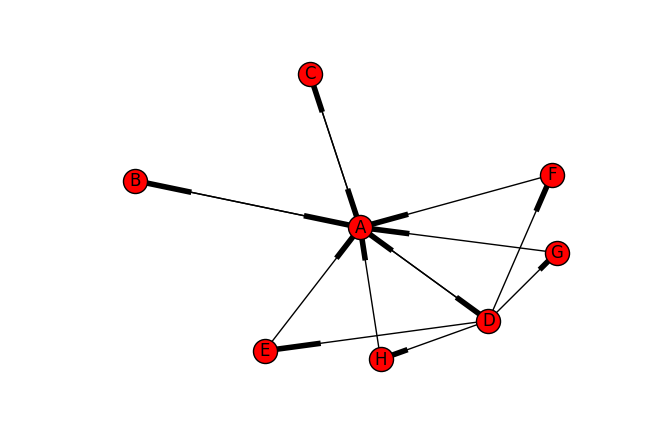

In [13]:
plot(G3)

In [14]:
pagerank(G3)

({'A': 3.3524802090129997,
  'B': 1.0998696190764279,
  'C': 1.0998696190764279,
  'D': 1.0998696190764279,
  'E': 0.33697773343942861,
  'F': 0.33697773343942861,
  'G': 0.33697773343942861,
  'H': 0.33697773343942861},
 20)

## Hierarchy

In [15]:
G4 = nx.DiGraph(
    [('A', 'B'), ('B', 'A'), ('A', 'C'), ('C', 'A'), ('A', 'D'), ('D', 'A')]
)

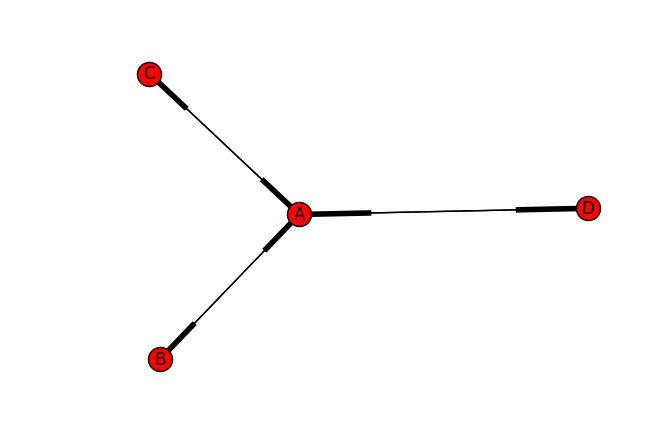

In [16]:
plot(G4)

In [17]:
pagerank(G4)

({'A': 1.9189185106178592,
  'B': 0.69369382979404692,
  'C': 0.69369382979404692,
  'D': 0.69369382979404692},
 89)

## Looping

In [18]:
G5 = nx.DiGraph(
    [('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'A')]
)

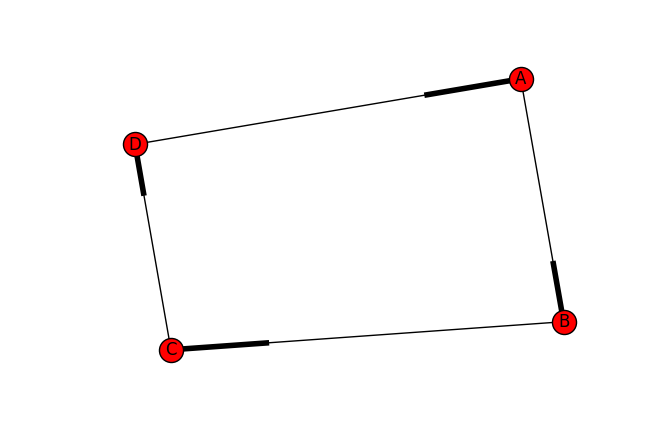

In [19]:
plot(G5)

In [20]:
pagerank(G5)

({'A': 1.0, 'B': 1.0, 'C': 1.0, 'D': 1.0}, 0)

## Interlinking

In [21]:
G6 = nx.DiGraph(
    [('A', 'B'), ('A', 'C'), ('A', 'D'),
    ('B', 'A'), ('B', 'C'), ('B', 'D'),
    ('C', 'A'), ('C', 'B'), ('C', 'D'),
    ('D', 'A'), ('D', 'B'), ('D', 'C')]
)

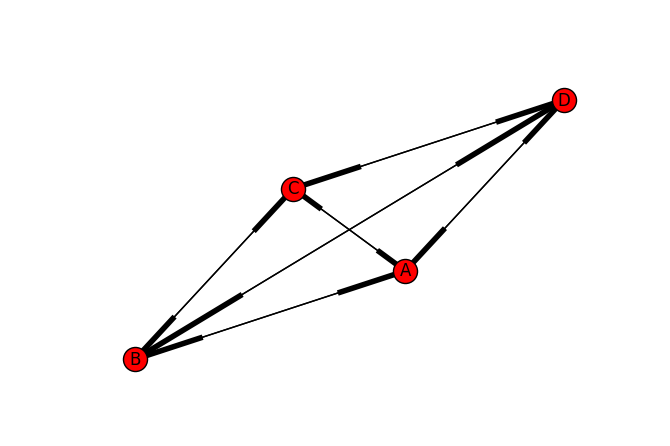

In [22]:
plot(G6)

In [23]:
pagerank(G6)

({'A': 1.0, 'B': 1.0, 'C': 1.0, 'D': 1.0}, 0)

## Hierarchy + link in/out

In [24]:
G7 = nx.DiGraph(
    [('A', 'B'), ('B', 'A'), ('A', 'C'), ('C', 'A'), ('A', 'D'), ('D', 'A'), ('E', 'A'), ('C', 'F')]
)

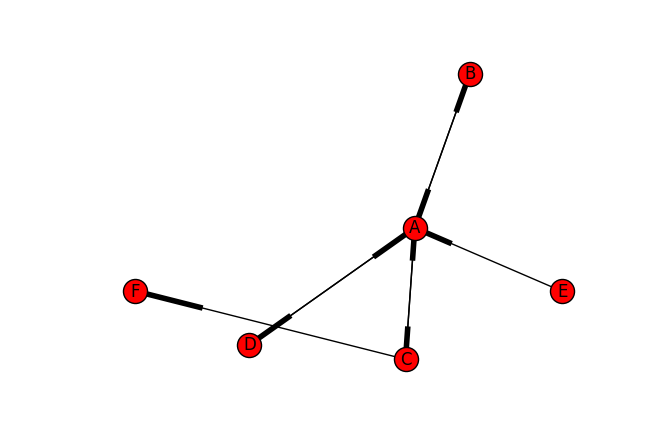

In [25]:
plot(G7)

In [26]:
pagerank(G7)

({'A': 1.4984299820679512,
  'B': 0.5745549162855732,
  'C': 0.5745549162855732,
  'D': 0.5745549162855732,
  'E': 0.15000000000000002,
  'F': 0.39418599641359031},
 58)

## Looping + link in/out

In [27]:
G8 = nx.DiGraph(
    [('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'A'), ('E', 'A'), ('D', 'F')]
)

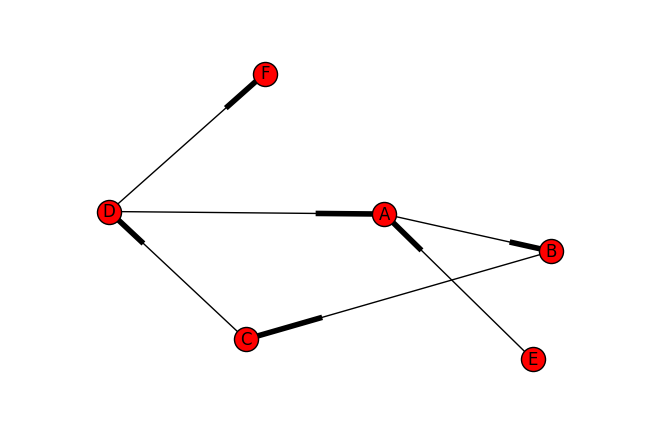

In [28]:
plot(G8)

In [29]:
pagerank(G8)

({'A': 0.59742740984840759,
  'B': 0.65781329837114644,
  'C': 0.70914206944617952,
  'D': 0.75277037611389996,
  'E': 0.15000000000000002,
  'F': 0.46992740984840747},
 42)

## Interlinking + link in/out

In [30]:
G9 = nx.DiGraph(
    [('A', 'B'), ('A', 'C'), ('A', 'D'),
    ('B', 'A'), ('B', 'C'), ('B', 'D'),
    ('C', 'A'), ('C', 'B'), ('C', 'D'),
    ('D', 'A'), ('D', 'B'), ('D', 'C'),
    ('E', 'A'), ('D', 'F')]
)

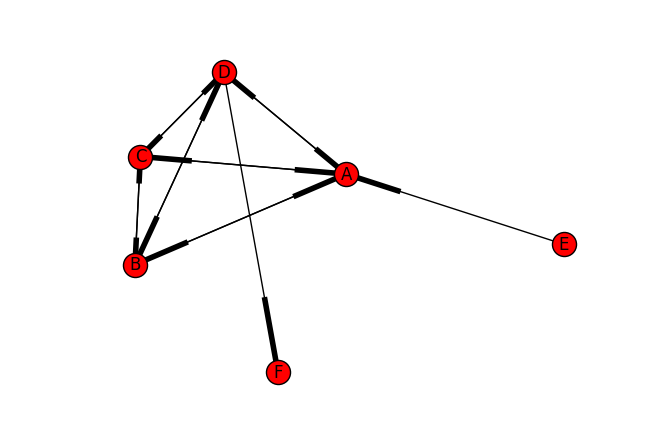

In [31]:
plot(G9)

In [32]:
pagerank(G9)

({'A': 0.95411843488380421,
  'B': 0.85476778553315491,
  'C': 0.85476778553315491,
  'D': 0.90470271376382483,
  'E': 0.15000000000000002,
  'F': 0.34224952614082144},
 49)

## High PageRank

In [33]:
G10 = nx.DiGraph()
G10.add_edge(0, 1)
for i in range(2, 10):
    G10.add_edges_from([(1, i), (i, 0)])

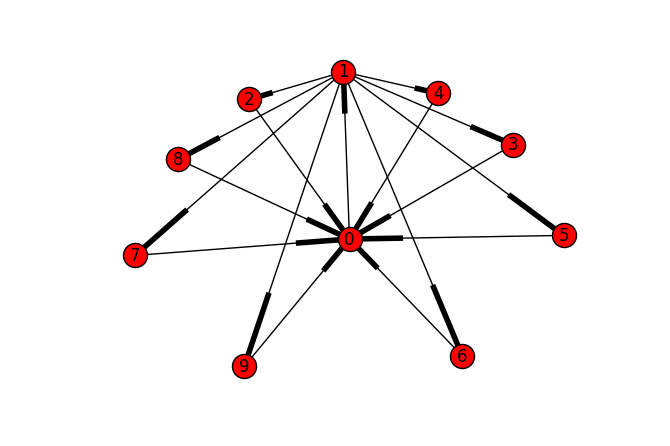

In [34]:
plot(G10)

In [35]:
pagerank(G10)

({0: 3.3129257795615641,
  1: 2.9659860651018559,
  2: 0.46513601941707222,
  3: 0.46513601941707222,
  4: 0.46513601941707222,
  5: 0.46513601941707222,
  6: 0.46513601941707222,
  7: 0.46513601941707222,
  8: 0.46513601941707222,
  9: 0.46513601941707222},
 96)